In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-prediction/heart.csv


# Context
* Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

* People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Data input

In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [4]:
df.head() # data view

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Attribute Information
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [5]:
df.shape # the shape of data is 918 rows and 12 columns

(918, 12)

In [6]:
df.dtypes # the type of data

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
df.nunique() # every columns unique value number

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [8]:
df.ChestPainType.unique() # view unique value in ChestPainType

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [9]:
df.isnull().sum() # judge null value

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
# change to categorical number
# Sex
df.Sex.replace({'M':1,'F':0}, inplace = True)
# ChestPainType
df.ChestPainType.replace({'TA':0, 'ATA':1, 'NAP':2, 'ASY':3 }, inplace = True)
# RestingECG 
df.RestingECG.replace({'Normal':0, 'ST':1, 'LVH':2}, inplace = True)
# ExerciseAngina
df.ExerciseAngina.replace({'N':0, 'Y':1}, inplace = True)
# ST_Slope
df.ST_Slope.replace({'Up':0, 'Flat':1, 'Down':2}, inplace = True)

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


In [12]:
# define categorical and continuous feature
cat_col = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'] # categorical features
con_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'] # continuous features

In [13]:
round(df[con_col].describe(), 2) # two decimal

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89
std,9.43,18.51,109.38,0.42,25.46,1.07
min,28.00,0.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,0.00,120.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60
75%,60.00,140.00,267.00,0.00,156.00,1.50
max,77.00,200.00,603.00,1.00,202.00,6.20


# Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(style='whitegrid')

config = {
    "font.family":'serif',
    "font.size": 10.5,
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
}
rcParams.update(config)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator


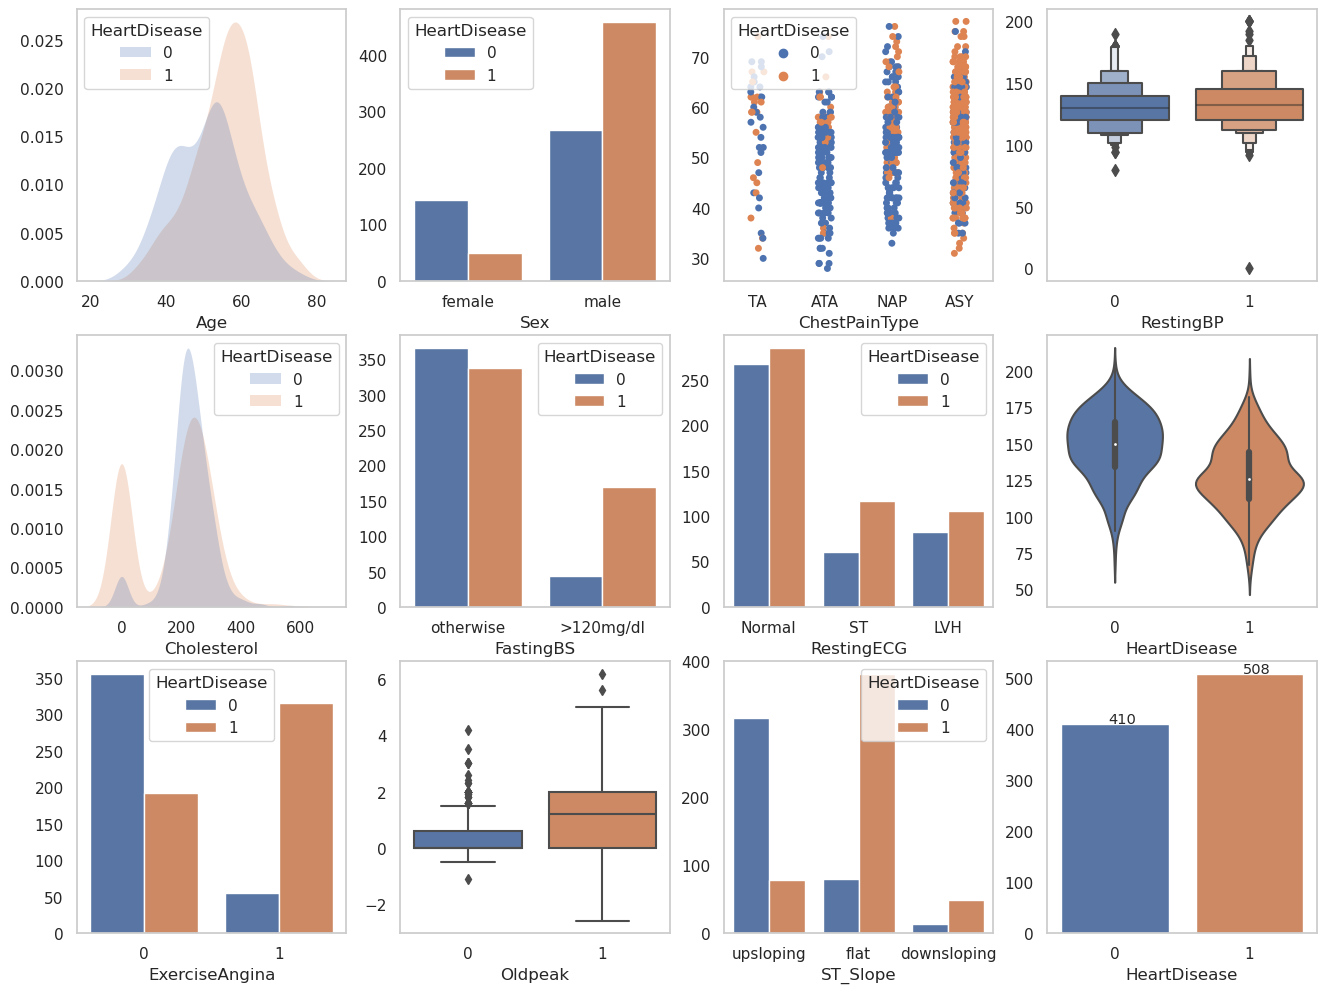

In [15]:
fig, ax = plt.subplots(3,4,figsize=(16,12))
# Age the relationship between Age and HeartDisease

sns.kdeplot(
    ax = ax[0][0],
    data = df,
    x = 'Age',
    hue = 'HeartDisease',
    fill = True,
    linewidth = 0
)
ax[0][0].grid(False)
ax[0][0].set_ylabel('')
sns.move_legend(ax[0][0], loc='upper left') # move legend location

# Sex
sns.countplot(
    ax = ax[0][1],
    data = df,
    x = 'Sex',
    hue = 'HeartDisease'
)
ax[0][1].grid(False)
ax[0][1].set_xticklabels(['female','male'])
ax[0][1].set_ylabel('')

# ChestPainType
sns.stripplot(
    ax = ax[0][2],
    data=df,
    x='ChestPainType',
    y='Age',
    hue='HeartDisease'
)
ax[0][2].set_xticklabels(['TA', 'ATA', 'NAP', 'ASY'])
ax[0][2].set_ylabel('')
ax[0][2].grid(False)

# RestingBP
sns.boxenplot(
    ax = ax[0][3],
    data = df,
    y = 'RestingBP',
    x = 'HeartDisease'
)
ax[0][3].set_ylabel('')
ax[0][3].set_xlabel('RestingBP')
ax[0][3].grid(False)

# Cholesterol
sns.kdeplot(
    ax = ax[1][0],
    data = df,
    x = 'Cholesterol',
    hue = 'HeartDisease',
    fill = True,
    linewidth = 0
)
ax[1][0].grid(False)
ax[1][0].set_ylabel('')

# FastingBS fasting blood sugar
sns.countplot(
    ax = ax[1][1],
    data = df,
    x = 'FastingBS',
    hue = 'HeartDisease'
)
ax[1][1].set_xticklabels(['otherwise','>120mg/dl'])
ax[1][1].grid(False)
ax[1][1].set_ylabel('')

# RestingECG
sns.countplot(
    ax = ax[1][2],
    data = df,
    x = 'RestingECG',
    hue = 'HeartDisease'
)
ax[1][2].set_xticklabels(['Normal','ST','LVH'])
ax[1][2].grid(False)
ax[1][2].set_ylabel('')

# MaxHR
sns.violinplot(
    ax = ax[1][3],
    data = df,
    y = 'MaxHR',
    x = 'HeartDisease'
)
ax[1][3].grid(False)
ax[1][3].set_ylabel('')


# ExerciseAngina exercise-induced angina
sns.countplot(
    ax = ax[2][0],
    data = df,
    x = 'ExerciseAngina',
    hue = 'HeartDisease'
)
ax[2][0].grid(False)
ax[2][0].set_ylabel('')

# Oldpeak
sns.boxplot(
    ax = ax[2][1],
    data =df,
    x = 'HeartDisease',
    y = 'Oldpeak'
)
ax[2][1].grid(False)
ax[2][1].set_ylabel('')
ax[2][1].set_xlabel('Oldpeak')

# ST_Slope
sns.countplot(
    ax = ax[2][2],
    data = df,
    x = 'ST_Slope',
    hue = 'HeartDisease',
)
ax[2][2].set_xticklabels(['upsloping', 'flat', 'downsloping'])
ax[2][2].grid(False)
ax[2][2].set_ylabel('')

# HeartDisease
sns.countplot(
    ax = ax[2][3],
    data = df,
    x = 'HeartDisease',
)
for x, y in enumerate(df.HeartDisease.value_counts()[::-1]):
    # print(x,y)
   ax[2][3].text(x-0.05,y+3,'%s'%y)
ax[2][3].grid(False)
ax[2][3].set_ylabel('')

plt.show()

# Conclusions of EDA

 1. 58 years old people more tend to have heart disease
 2. male more tend to have heart disease than female
 3. the chest pain type of patient more likely is asymptomatic
 4. blood pressure of heart disease patient have exception value, such as zero
 5. serum Cholesterol of heart disease patient is lower than normal people
 6. when fasting blood sugar > 120 mg/dl, the number of patien whose fasting blood sugar bigger than 120 mg/dl is more. But when fasting blood sugar < 120 mg/dl, the number of normal people is more.
 7. the number of people who have ST-T wave abnormality is double than normal people
 8. the max heart rate of patient is lower
 9. patient more tend to have exercise-induced angina
 10. the oldpeak of patient is higher
 11. flat and downsloping people more tend to have heart disease
 12. the number of patient is 508 that more than normal people


# Prediction

In [16]:
# Scaling
from sklearn.preprocessing import RobustScaler
# Train Test Split
from sklearn.model_selection import train_test_split

# models
# svc
from sklearn.svm import SVC
# logistic regression
from sklearn.linear_model import LogisticRegression
# random forest
from sklearn.ensemble import RandomForestClassifier
# decision tree
from sklearn.tree import DecisionTreeClassifier
# boosting
from sklearn.ensemble import GradientBoostingClassifier
# xgboost
import xgboost
# metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve
# crossover validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [17]:
# one-hot coding
df = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [18]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_1,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_1,RestingECG_2,ExerciseAngina_1,ST_Slope_1,ST_Slope_2
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,0,0,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,1,0,0,0,0
3,48,138,214,0,108,1.5,1,0,0,0,1,0,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,0,0,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,1,0,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,1,0,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0,1,0


In [19]:
# define the features and target
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

# data scaler
scaler = RobustScaler()
X[con_col] = scaler.fit_transform(X[con_col])

X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_1,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_1,RestingECG_2,ExerciseAngina_1,ST_Slope_1,ST_Slope_2
0,-1.076923,0.5,0.704000,0.0,0.944444,-0.400000,1,1,0,0,0,0,0,0,0
1,-0.384615,1.5,-0.458667,0.0,0.500000,0.266667,0,0,1,0,0,0,0,1,0
2,-1.307692,0.0,0.640000,0.0,-1.111111,-0.400000,1,1,0,0,1,0,0,0,0
3,-0.461538,0.4,-0.096000,0.0,-0.833333,0.600000,0,0,0,1,0,0,1,1,0
4,0.000000,1.0,-0.298667,0.0,-0.444444,-0.400000,1,0,1,0,0,0,0,0,0


In [20]:
# define the train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('X_train shape is', X_train.shape)
print('X_test shape is', X_test.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)

X_train shape is (734, 15)
X_test shape is (184, 15)
y_train shape is (734,)
y_test shape is (184,)


### support vector classifier

In [21]:
svc = SVC(kernel='linear', C=1, random_state=1, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('the score of svc is', accuracy_score(y_pred, y_test))

the score of svc is 0.907608695652174


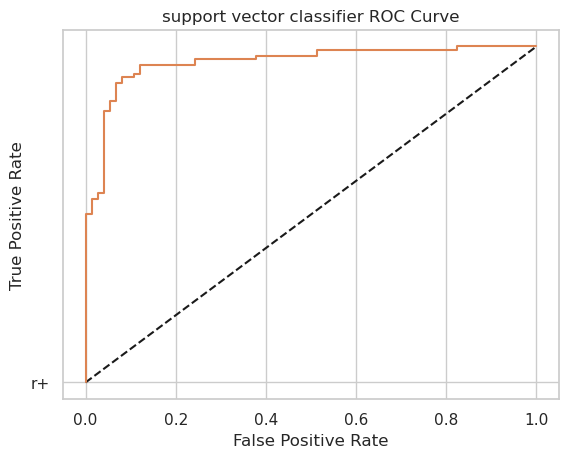

In [22]:
# roc curve
# calculating the probabilities
y_pred_prob = svc.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr, tpr, threshols = roc_curve(y_test, y_pred_prob)

# plotting the curve
plt.plot([0,1], [0,1], "k--", 'r+')
plt.plot(fpr, tpr, label='support vector classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("support vector classifier ROC Curve")
plt.show()

### logistic regression

In [23]:
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('the score of logistic regression is', accuracy_score(y_pred, y_test))

the score of logistic regression is 0.8967391304347826


### random forest

In [24]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('the score of random forest is', accuracy_score(y_pred, y_test))

the score of random forest is 0.8858695652173914


### decision tree

In [25]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('the score of decision tree is', accuracy_score(y_pred, y_test))

the score of decision tree is 0.8260869565217391


### gradient boosting

In [26]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('the score of gradient boosting is', accuracy_score(y_pred, y_test))

the score of gradient boosting is 0.8858695652173914


### xgboosting

In [27]:
xgb = xgboost.XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('the score of xgboosting is', accuracy_score(y_pred, y_test))

the score of xgboosting is 0.8804347826086957
